# Day 50 – MNIST Digit Recognition (Basic Neural Network)

## Objective
Build a basic neural network using Keras Sequential API to classify handwritten digits from the MNIST dataset.

## Dataset
- MNIST handwritten digits
- Images: 28x28 grayscale
- Classes: 0–9

## Steps
1. Load and visualize MNIST data
2. Preprocess images (flatten + normalize)
3. Build a Sequential neural network
4. Train and evaluate the model


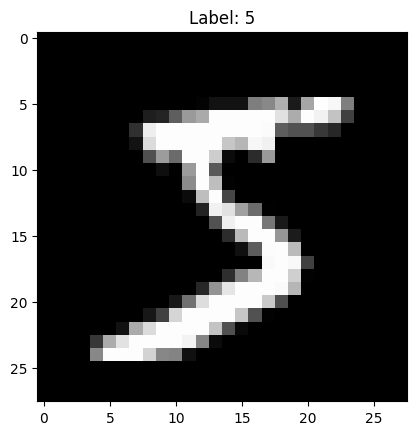

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8622 - loss: 0.4778 - val_accuracy: 0.9601 - val_loss: 0.1385
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9632 - loss: 0.1190 - val_accuracy: 0.9626 - val_loss: 0.1246
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9770 - loss: 0.0764 - val_accuracy: 0.9692 - val_loss: 0.0993
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9821 - loss: 0.0561 - val_accuracy: 0.9649 - val_loss: 0.1182
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9857 - loss: 0.0419 - val_accuracy: 0.9694 - val_loss: 0.1062
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9722 - val_loss: 0.0967
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9904 - loss: 0.0284 - val_accuracy: 0.9739 - val_loss: 0.0948
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0216 - 

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize sample
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Preprocess
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
